In [204]:
#%pylab inline
%matplotlib
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression #para hacer regresiones lineales
from sklearn.cross_validation import train_test_split #para separar datos entre datos de test y entrenamiento
from sklearn import metrics # para medir (metricas) errores, etc.

Using matplotlib backend: MacOSX


In [205]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)
data.head()#escribe las primeras 10 lineas de data


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [206]:
data.shape # da las dimensiones de data 

(400, 11)

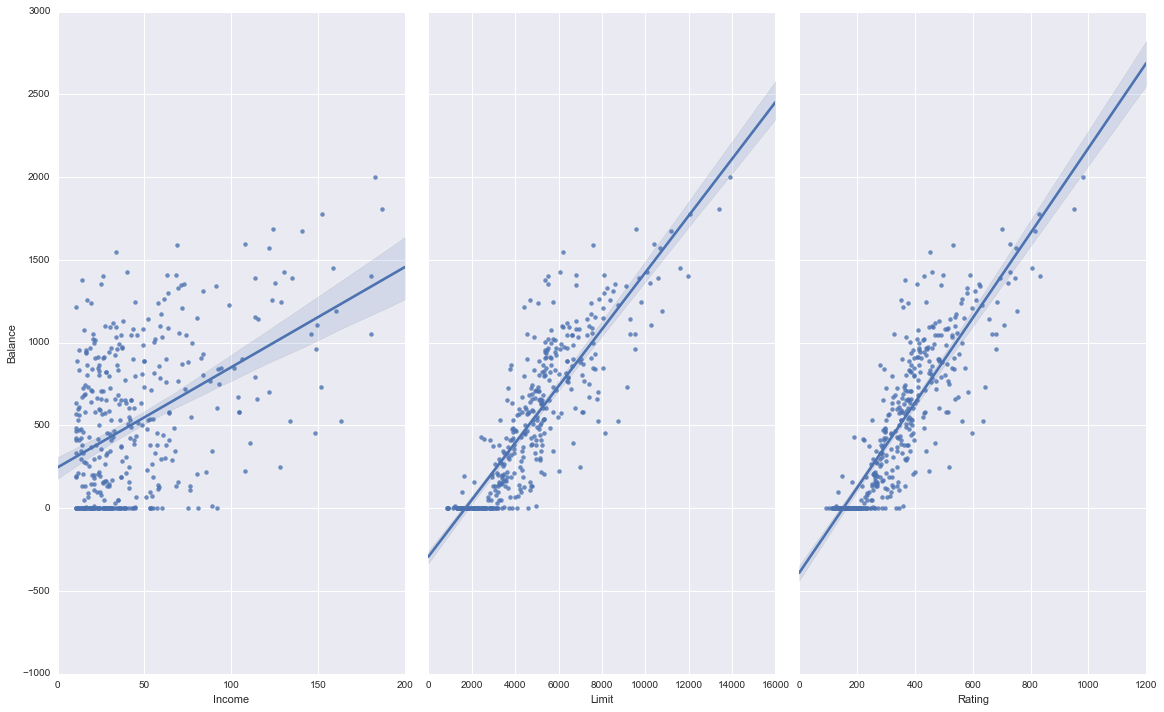

In [207]:
sns.pairplot(data, x_vars=['Income','Limit','Rating'], y_vars='Balance', size=10, aspect=0.7, kind='reg')

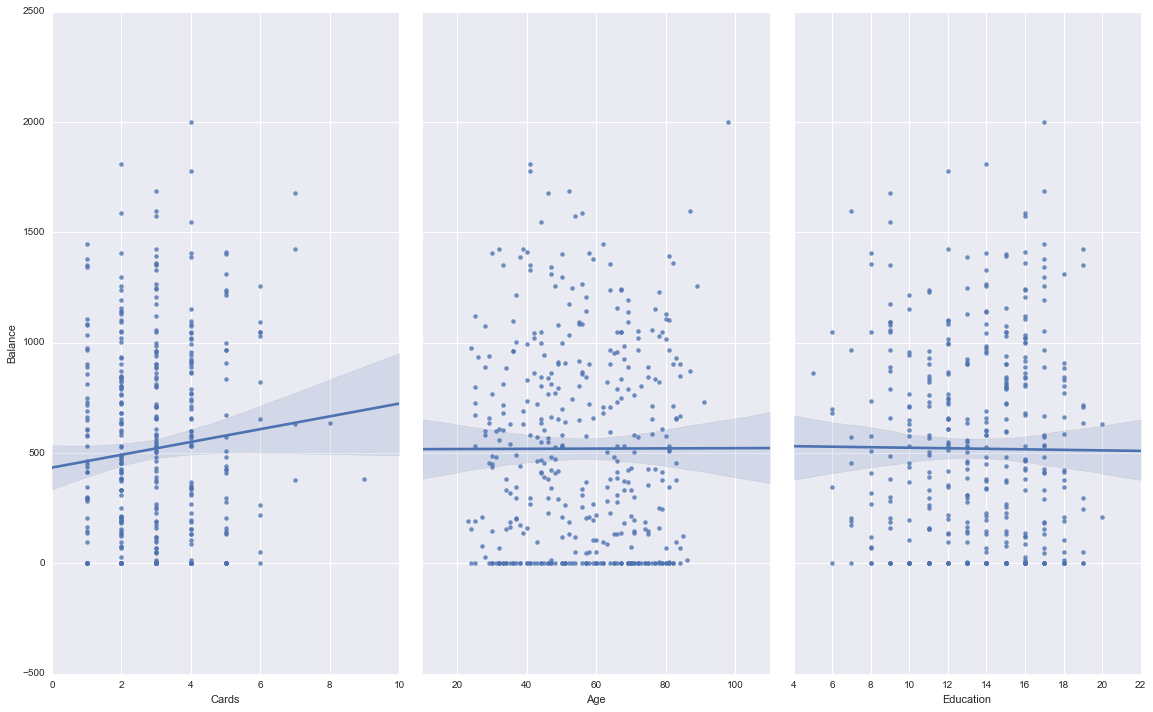

In [208]:
sns.pairplot(data, x_vars=['Cards','Age','Education'], y_vars='Balance', size=10, aspect=0.7, kind='reg')

In [209]:
X = data[['Income','Limit','Rating','Cards','Age','Education']]
Y=data[['Balance']]
#dividiendo los datos en entrenamiento y test.
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, random_state=1)

In [210]:
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, Y_train)

#aqui estan los coeficientes del interceptos y los factores lineales de cada variable.
print linreg.intercept_

print linreg.coef_


[-501.93338249]
[[ -7.1529831    0.09876284   2.4013875   11.86448085  -0.86082353
    2.54032094]]


## Podemos notar que tanto el coeficiente para "Limit" como tambien el de "Age" no parecen ser tan importantes como los demas debido a su pendiente.

In [211]:
#se puede predecir cuales son los valores de Y_test usando la siguiente funcion
Y_pred=linreg.predict(X_test)

In [212]:
metrics.mean_absolute_error(Y_test, Y_pred) # muy grande! variansa cuadrado

127.68109418942399

In [213]:
metrics.mean_squared_error(Y_test, Y_pred)# 

29946.257182565314

In [214]:
sqrt(metrics.mean_squared_error(Y_test, Y_pred))# error con raiz 

173.04986906254888


# Probemos sin algunos datos


In [215]:
#Preparando datos

X = data[['Income','Limit','Rating','Cards']]

Y=data[['Balance']]
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, random_state=1)

# Haciendo regresión
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
print "intercepto",linreg.intercept_
print "coeficientes ",linreg.coef_

#Predición
Y_pred=linreg.predict(X_test)
#Error

sqrt(metrics.mean_squared_error(Y_test, Y_pred))# error con raiz 

intercepto [-509.67983519]
coeficientes  [[ -7.23962329   0.10367802   2.33274487  11.62742259]]


173.75724801870365

In [216]:
X.head()

,Income,Limit,Rating,Cards
1,14.891,3606,283,2
2,106.025,6645,483,3
3,104.593,7075,514,4
4,148.924,9504,681,3
5,55.882,4897,357,2


In [217]:
Index=['Income','Limit','Rating','Cards','Age','Education']
Y=data[['Balance']]
minimo=500
for i in Index:
    for j in Index:
        if(i!=j):
            X=data[[i,j]]
            X_train,X_test,Y_train,Y_test=train_test_split(X, Y, random_state=1)
            linreg = LinearRegression()
            linreg.fit(X_train, Y_train)
            Y_pred=linreg.predict(X_test)
            a=sqrt(metrics.mean_squared_error(Y_test, Y_pred))
            if(a<minimo):
                minimo=a
                datos=i+" "+ j
            print  sqrt(metrics.mean_squared_error(Y_test, Y_pred)), i, j
            
    
print datos

174.347017929 Income Limit
175.624545895 Income Rating
433.35226442 Income Cards
429.586989249 Income Age
433.143302365 Income Education
174.347017929 Limit Income
263.331902478 Limit Rating
261.152376931 Limit Cards
258.069092006 Limit Age
263.357741948 Limit Education
175.624545895 Rating Income
263.331902478 Rating Limit
262.588639396 Rating Cards
257.6703503 Rating Age
263.125849321 Rating Education
433.35226442 Cards Income
261.152376931 Cards Limit
262.588639396 Cards Rating
490.065115476 Cards Age
489.840060204 Cards Education
429.586989249 Age Income
258.069092006 Age Limit
257.6703503 Age Rating
490.065115476 Age Cards
486.359061904 Age Education
433.143302365 Education Income
263.357741948 Education Limit
263.125849321 Education Rating
489.840060204 Education Cards
486.359061904 Education Age
Income Limit


# $ Ridge\ Method\ $

In [187]:
from sklearn import linear_model

In [218]:
#Preparando  los datos
X = data[['Income','Limit','Rating','Cards','Age','Education']]
Y=data[['Balance']]

#Dividiendo los datos en entrenamiento y test.
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, random_state=1)
print X_train.shape
print Y_train.shape
print X_test.shape
print Y_test.shape

(300, 6)
(300, 1)
(100, 6)
(100, 1)


In [219]:
clf = linear_model.LinearRegression()
lf = linear_model.Ridge (alpha = .5)
clf.fit (X_train,Y_train) 

print "Intercepto", clf.intercept_
print "\nCoeficientes", clf.coef_



Intercepto [-501.93338249]

Coeficientes [[ -7.1529831    0.09876284   2.4013875   11.86448085  -0.86082353
    2.54032094]]


In [220]:
A=linspace(1*10**-4, 10000,50000)
clf = linear_model.RidgeCV(alphas=A)
clf.fit(X_train,Y_train)       
print "alpha",clf.alpha_ 
print "Intercepto", clf.intercept_
print "Coeficientes", clf.coef_

Y_pred_ridge=clf.predict(X_test)


alpha 2551.45110351
Intercepto [-473.49935649]
Coeficientes [[-7.04956586  0.0666981   2.86337674  1.78355037 -0.83290209  1.33131809]]


In [221]:
Y_pred.shape

(100, 1)

In [223]:
sqrt(metrics.mean_squared_error(Y_test, Y_pred_ridge))

173.69316120593382

# $ Using\ Lasso\ $

In [224]:
clf = linear_model.Lasso(alpha = 0.1)

In [225]:
X = data[['Income','Limit','Rating','Cards','Age','Education']]
Y=data[['Balance']]

#Dividiendo los datos en entrenamiento y test.
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, random_state=1)
print X_train.shape
print Y_train.shape
print X_test.shape
print Y_test.shape

(300, 6)
(300, 1)
(100, 6)
(100, 1)


In [226]:
clf.fit(X_train,Y_train)
print "Coeficientes",clf.coef_
print "Intercepto",clf.intercept_
print "Alpha",clf.alpha
Y_pred_lasso=clf.predict(X_test)

Coeficientes [ -7.15324534   0.1005608    2.37482556  11.94156015  -0.86012193
   2.52281512]
Intercepto [-501.03865801]
Alpha 0.1


In [227]:
sqrt(metrics.mean_squared_error(Y_test, Y_pred_lasso))

173.02052886145117

In [228]:
#['Income','Limit','Rating','Cards','Age','Education']
A=linspace(1*10**-4, 10000,50000)
clf = linear_model.LassoCV(alphas=A)
clf.fit(X_train,Y_train)       
print "alpha",clf.alpha_ 
print "Intercepto", clf.intercept_
print "Coeficientes", clf.coef_

Y_pred_lasso1=clf.predict(X_test)
sqrt(metrics.mean_squared_error(Y_test, Y_pred_lasso1))


alpha 29.4006877178
Intercepto -457.742567344
Coeficientes [-7.13300064  0.06477007  2.90624978  0.         -0.73787815  0.        ]


/Users/daniellozano/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


173.44861563407343

## Hemos obtenido que los coeficientes de educacion y tarjetas no son de gran importancia, volvamos a hacer este proceso sin estas variabels

In [229]:
X = data[['Income','Limit','Rating','Age']]
Y=data[['Balance']]

#Dividiendo los datos en entrenamiento y test.
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, random_state=1)

In [230]:
A=linspace(1, 10000,50000)
clf = linear_model.LassoCV(alphas=A)
clf.fit(X_train,Y_train)       
print "alpha",clf.alpha_ 
print "Intercepto", clf.intercept_
print "Coeficientes", clf.coef_

Y_pred_lasso1=clf.predict(X_test)
sqrt(metrics.mean_squared_error(Y_test, Y_pred_lasso1))



alpha 31.597551951
Intercepto -457.445099174
Coeficientes [-7.12842116  0.06583003  2.88962861 -0.73103348]


/Users/daniellozano/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


173.45652242351483